### Задание 1.3. Булевы модели ###

#### *1. Двигатель автомобиля имеет 4 свечи зажигания, по одной на каждый цилиндр. Интенсивность отказов свечи $\lambda = 10^{-3}~ч^{−1}$. Предполагается, что автомобиль может ехать также при одном неработающем цилиндре. Необходимо:* ####
#### *- вычислить вероятность безотказной работы двигателя и построить ее график;* ####
#### *- определить вероятность того, что путешествие длительностью t = 20 часов закончится благополучно (без замены свечей).* ####

Вероятность безотказной работы:
$$R(t) = e^{-4\lambda t} + 4 e^{-3\lambda t}(1-e^{-\lambda t})

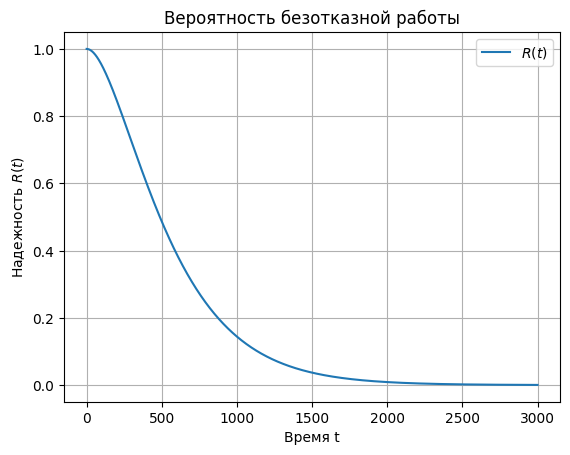

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import log, exp

lambda_val = 0.001

def R(t):
    return np.exp(-4 * lambda_val * t) + 4 * np.exp(-3 * lambda_val * t) * (1 - np.exp(-lambda_val * t))

# Время для построения графика
time_points = np.linspace(0, 3000, 1000)  # Время в часах
R_values = R(time_points)

# Построим график
plt.plot(time_points, R_values, label=r'$R(t)$')
plt.title("Вероятность безотказной работы")
plt.xlabel("Время t")
plt.ylabel(r"Надежность $R(t)$")
plt.grid(True)
plt.legend()
plt.show()

Вероятность того, что путешествие длительностью t = 20 часов закончится благополучно (без замены свечей):

In [7]:
R(20)

0.9977090951770876

#### *2. Схема расчета надёжности системы представлена на рисунке. Выписать структурную функцию системы и вычислить ее вероятность работоспособности, если известны вероятности безотказной работы ее элементов: $$p_1 = p_2 = p_3 = 0.9,~ p_4 = p_5 = p_6 = 0.8$$* ####
<p align="center">
  <img src="images\6.jpg" />
</p>

Структурная функция для левой части:
$$S_1(x_1, x_2, x_3) = 1 − (1 − x_1)(1 − x_2)(1 − x_3)$$

Структурная функция для правой части:
$$S_1(x_4, x_5, x_6) = 1 − (1 − x_4)(1 − x_5)(1 − x_6)$$

Структурная функция всей системы:
$$S_1(x_1, x_2, x_3, x_4, x_5, x_6) = (1 − (1 − x_1)(1 − x_2)(1 − x_3))(1 − (1 − x_4)(1 − x_5)(1 − x_6)) $$

Вероятность работоспособности:

In [10]:
x1, x2, x3 = 0.9, 0.9, 0.9
x4, x5, x6 = 0.8, 0.8, 0.8

(1 - (1 - x1) * (1 - x2) * (1 - x3)) * (1 - (1 - x4) * (1 - x5) * (1 - x6))

0.991008

#### *3. Житель г. Истра едет на автомобиле в гости к другу в г. Нахабино. По пути ему могут встретиться дорожные работы. Тогда он будет вынужден развернуться и ехать другой дорогой. Удельная интенсивность дорожных работ равна $0.1~год^{−1}$ на $1~км$, а расстояние на участке Истра-Новинки-Нахабино – $12~км$, на участке Истра-Поздняково-развилка – $12.5~км$, на участке от развилки до Нахабино по прямой – $3.3~км$ и через шоссе – $7~км$. Скорость автомобиля считать равной $60~км/ч$.* ####
<p align="center">
  <img src="images\7.jpg" width=500/>
</p>

#### *Необходимо:* #### 
#### *- построить структурную схему дорожной сети;* ####
#### *- вычислить структурную функцию путем разложения на последовательно-параллельные блоки;* ####
#### *- вычислить вероятность того, что автомобиль доберется из Истры в Нахабино* #### 

Структурная схема дорожной сети:
<p align="center">
  <img src="images\8.jpg" width=500/>
</p>

Вычисление структурной функции:
$$S_{34}(x_3, x_4) = 1 - (1 - x_3)(1 - x_4)$$
$$S_{234}(x_2, x_3, x_4) = x_2(1 - (1 - x_3)(1 - x_4)) $$
$$S(x_1, x_2, x_3, x_4) = 1 - (1 - x_1)(1 - x_2(1 - (1 - x_3)(1 - x_4)))$$

In [13]:
x1 = exp(-(1/87600)*(12**2)/60)
x2 = exp(-(1/87600)*(12.5**2)/60)
x3 = exp(-(1/87600)*(3.3**2)/60)
x4 = exp(-(1/87600)*(7**2)/60)

1 - (1 - x1) * (1 - x2 * (1 - (1 - x3) * (1 - x4)))

0.9999999991855589